<a href="https://colab.research.google.com/github/Vincent-Emma/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Vince's_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

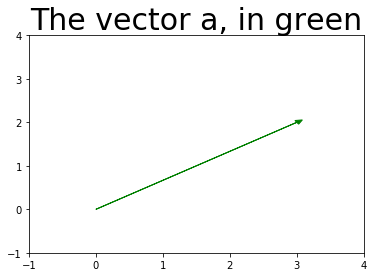

In [3]:

a = [3,2]

plt.arrow(0,0, a[0], a[1], head_width=.1, head_length=0.1, color ='green')

plt.xlim(-1, 4)
plt.ylim(-1, 4)

plt.title('The vector a, in green', size=30);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
b = [17, -4, -2, 1]

norm_b = np.linalg.norm(b)
print(norm_b)

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [6]:
c = [3,7,-2,12]
d = [9,-7,4,6]

print("c dot d: {}".format(np.dot(c,d)))

c dot d: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
E = [[7, 4, 2],
    [1, 3, -1],
    [2, 6, -4]]

E_T = np.transpose(E)
E_inv = np.linalg.inv(E)

print('Transpose of E:\n', E_T)
print('\nInverse of E:\n', E_inv)

Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]

Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [15]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [16]:
for col in df.columns:
    print(str(col)+ ' mean: '+ str(np.mean(df[col])) )
    print(str(col)+ ' variance: '+ str(np.var(df[col])) )
    print(str(col)+ ' stdev: '+ str(np.std(df[col])) )

customers mean: 1135.7142857142858
customers variance: 84653.06122448981
customers stdev: 290.95199127087926
snow mean: 2.7142857142857144
snow variance: 7.346938775510203
snow stdev: 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [19]:
#almost a 73% confident chance that the two are positively correlated

customers_coefvar = df.std()[0] / df.mean()[0]

powder_coefvar = df.std()[1] / df.mean()[1]

cov_divided_by_stdvsproduct = (df.cov() / (df.std()[0] * df.std()[1]))
pearson_coef = cov_divided_by_stdvsproduct.iloc[0][1]

print("\nabs difference between coefficients of variation: {}".format(abs(customers_coefvar - powder_coefvar)))


print("\nPearson's correlation coefficient: {}".format(pearson_coef))


abs difference between coefficients of variation: 0.8019158958343269

Pearson's correlation coefficient: 0.7284634644730714


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [18]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [38]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data

df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler

features = df.columns.tolist()
features.remove('Country')

target = 'Country'

In [0]:
x = df.loc[:,features].values

y = df.loc[:,target].values

x = StandardScaler(with_std=True).fit_transform(x)

In [0]:
std_df = pd.DataFrame(data = x, columns = features)

In [43]:
std_df = pd.merge(std_df, df['Country'], left_index=True, right_index=True)
std_df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pCs = pca.fit_transform(x)

p_df = pd.DataFrame(data = pCs,
                   columns = ['Principal Component 1', 'Principal Component 2'])

In [46]:
final_pca_df = pd.concat([p_df, df[target]], axis=1)
final_pca_df

,Principal Component 1,Principal Component 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


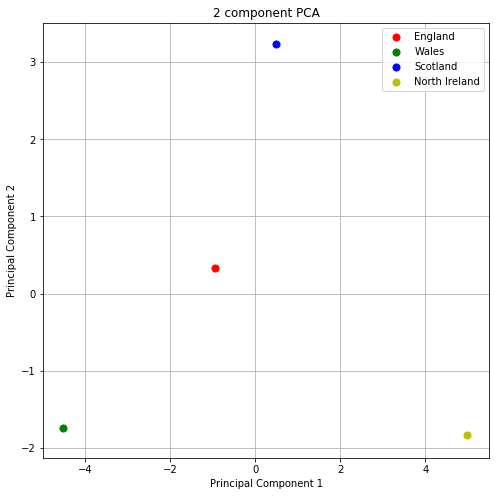

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = final_pca_df['Country'].tolist()
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indice = final_pca_df['Country'] == target
    ax.scatter(final_pca_df.loc[indice, 'Principal Component 1'], 
               final_pca_df.loc[indice, 'Principal Component 2'],
              c = color,
              s = 50)


ax.legend(targets)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [48]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [49]:
points_norm = StandardScaler().fit_transform(points)

print(points_norm)

[[-1.21526379e+00  2.86037188e-04]
 [-2.70846217e-01 -6.21863006e-01]
 [ 4.68740475e-01 -1.12237346e+00]
 [-8.97263139e-01 -3.23536806e-01]
 [ 3.34265444e-01 -1.12837792e+00]
 [-5.83901585e-01 -4.87876229e-01]
 [-1.27514964e+00 -3.61493204e-02]
 [-1.28101065e+00  1.14052055e-01]
 [-2.74000332e-01  1.58519487e+00]
 [-7.45507361e-01 -6.07004467e-01]
 [-3.70236546e-01 -8.21276183e-01]
 [-4.45252599e-01 -6.55731775e-01]
 [ 5.16199687e-01 -1.28425299e+00]
 [-5.12658923e-01 -8.40267708e-01]
 [-1.30684890e+00 -1.69198224e-01]
 [ 1.17498591e-01 -1.37830766e+00]
 [-1.15366593e+00 -1.74027100e-01]
 [-1.49353728e-01 -4.15974917e-01]
 [-5.57611813e-02 -7.92066494e-01]
 [ 1.99420407e+00  1.35805442e+00]
 [-1.24151228e+00  4.90205302e-02]
 [ 1.88969493e+00  1.51541391e+00]
 [ 1.89400952e+00  1.41370075e+00]
 [ 1.92043381e+00  1.40233100e+00]
 [-7.97113881e-02 -9.14291591e-01]
 [-6.51190075e-01 -1.06321676e+00]
 [ 5.26779895e-01 -1.20189377e+00]
 [ 1.50223553e-01  1.33386379e+00]
 [-5.02389343e-01 -8

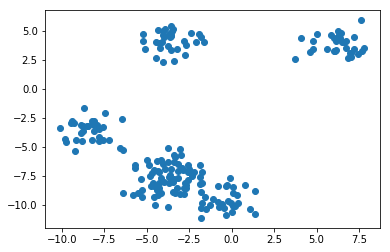

In [50]:
plt.scatter(points.x, points.y)
plt.show()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
points['cluster'] = km.fit_predict(points)


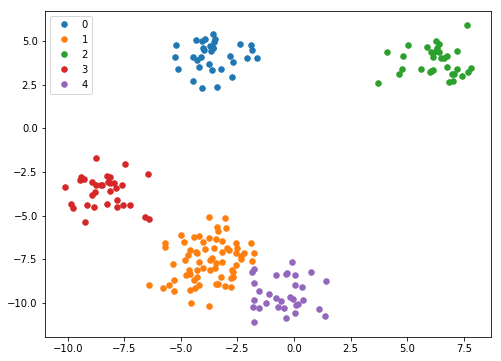

In [52]:
groups = points.groupby('cluster')

fig, ax = plt.subplots(figsize=(8, 6))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=11, label=name)
ax.legend()

plt.show()